In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets.samples_generator import make_blobs



%matplotlib inline

In [79]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [80]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [81]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    # MPP return [pointOnBoundary(x_min), pointOnBoundary(x_max)]
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [198]:
def pla(training_in, training_out, weights, max_iterations=1000):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        iterations+=1;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)[0]!=y):
                #iterations+=1;
                # MPP weights = weights + y*(np.concatenate((bias,x)))
                weights = (weights.T + y*(np.concatenate((bias,x)))).T
                errors+=1;
                     
        if (errors == 0):
            break
            
        # If results are not converging after maximum iterations are reached, exit
        if (iterations==max_iterations):
            break
            
    return weights, iterations

In [83]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

In [84]:
def print_dataset(X, y):
    # Plot the dataset
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("Dataset")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    plt.show() 

In [85]:
def plot_data_w_boundary(X, y, weights):
    # Print the data with a line representing the decision boundary
    y_bound = np.zeros([2])
    X_bound = np.zeros([2])
    
    # Get min and max X Coordinate in the Data Set    
    X_bound[0] = X[:,0].min()
    X_bound[1] = X[:,0].max()

    # Get the Y coordinates for min and max X
    y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("Dataset with Decision Boundary")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    # Plot Decision Boundary
    plt.plot(X_bound, y_bound, linestyle='dashed', color='black')
    
    plt.show() 

In [192]:
def run_pla(X, y, verbose=1):
    # Run PLA on dataet and display results
    
    # Create and initialize weights
    weights = np.zeros([X.shape[1]+1,1])
    # Set Bias to 1
    weights[0] = 1
    
    weights, iterations = pla(X, y, weights)
    
    plot_data_w_boundary(X, y, weights)
    
    if(verbose==1):
        print("Number of Iterations:      %5d" % iterations)
        print("Number of Training Samples:%5d" % X.shape[0])
        print("Calculation Error:         %8.2f"% calc_error(X, y, weights))
    
    return weights, iterations

# TASK 1

### Load bank-et1.csv into a Pandas dataframe

In [2]:
bank_df=pd.read_csv('bank_et1.csv')

### Examine the first few data rows and the last few data rows. 

In [3]:
bank_df.head(10)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,5,46,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,6,34,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,7,45,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,8,58,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,9,49,management,divorced,tertiary,no,20727,1.331625,-0.420830,no,no,cellular,1,apr,285,3,132,2,failure,no


In [4]:
bank_df.tail(10)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,1990,36,technician,married,tertiary,no,376,-0.064640,-0.001414,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,1991,39,admin.,divorced,secondary,no,112,-0.921793,0.819346,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,1992,78,retired,divorced,primary,no,527,-0.611713,2.519517,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,1993,35,management,married,NaN,no,2326,-0.624331,0.273081,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,1994,26,student,single,secondary,no,655,-0.249693,1.152874,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### Identify an attribute that can be the target/dependable variable for 2-class classification

##### In order to identify the target variable we have to check :
* which variables have only two categories,
* if there is any missing values within these variables, 
* which ones are not unbalanced in order to be well suited to our classification problem

In [13]:
#which variables have only two categories
bank_df.nunique()
#bank_df.dtypes

Unnamed: 0      2000
age               68
job               11
marital            3
education          3
default            2
balance         1274
ratio_bal_ln    2000
ratio_ln_inc    2000
housing            2
loan               2
contact            2
day               31
month             12
duration         655
campaign          11
pdays            363
previous          26
poutcome           3
subscribed         2
dtype: int64

#### Variables with only two categories :
default,housing,loan,contact,subscribed

In [21]:
print('Missing values for default variable :%5d' % bank_df['default'].isnull().sum())
print('Missing values for housing variable :%5d' % bank_df['housing'].isnull().sum())
print('Missing values for loan variable :%5d' % bank_df['loan'].isnull().sum())
print('Missing values for contact variable :%5d' % bank_df['contact'].isnull().sum())
print('Missing values for subscribed variable :%5d' % bank_df['subscribed'].isnull().sum())

Missing values for default variable :    0
Missing values for housing variable :    0
Missing values for loan variable :    0
Missing values for contact variable :  191
Missing values for subscribed variable :    0


since there are missing values for contact this variables won't be selected as a target

In [38]:
print(bank_df['default'].value_counts())
print(bank_df['housing'].value_counts())
print(bank_df['loan'].value_counts())
print(bank_df['subscribed'].value_counts())

no     1985
yes      15
Name: default, dtype: int64
no     1037
yes     963
Name: housing, dtype: int64
no     1750
yes     250
Name: loan, dtype: int64
no     1000
yes    1000
Name: subscribed, dtype: int64


The most balanced variables are Subscribed 50/50 and housing. **Subscribed** will then be **our target**

# TASK 2

### Calculate statistics for the numerical and categorical attributes.

In [40]:
bank_df.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [42]:
# Print the statistics for the Categorical Values
def attribute_stats(list,df):
    for x in list:
        records = df[x].count()
        blank_records = df.shape[0] - records
        print("\n ==== " + x + " - " + str(records) + " records (" + str(blank_records) + " missing) ====")
        print(df[x].value_counts(normalize=True, dropna=False))
    
attribute_stats(["job","marital", "education", "default", "housing", "loan", "contact", "poutcome", "subscribed"],bank_df)


 ==== job - 1990 records (10 missing) ====
management       0.2305
technician       0.1740
blue-collar      0.1490
admin.           0.1235
services         0.0825
retired          0.0810
student          0.0480
unemployed       0.0345
self-employed    0.0320
entrepreneur     0.0225
housemaid        0.0175
NaN              0.0050
Name: job, dtype: float64

 ==== marital - 2000 records (0 missing) ====
married     0.5555
single      0.3370
divorced    0.1075
Name: marital, dtype: float64

 ==== education - 1896 records (104 missing) ====
secondary    0.4975
tertiary     0.3420
primary      0.1085
NaN          0.0520
Name: education, dtype: float64

 ==== default - 2000 records (0 missing) ====
no     0.9925
yes    0.0075
Name: default, dtype: float64

 ==== housing - 2000 records (0 missing) ====
no     0.5185
yes    0.4815
Name: housing, dtype: float64

 ==== loan - 2000 records (0 missing) ====
no     0.875
yes    0.125
Name: loan, dtype: float64

 ==== contact - 1809 records (191 mis

### Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).

#### Numerical variables

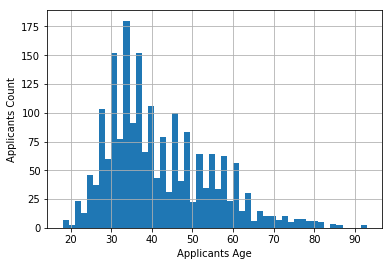

In [46]:
bank_df['age'].hist(bins=50)
plt.xlabel('Applicants Age')
plt.ylabel('Applicants Count')
plt.show()

We have already seen that minimum age was 18 with a mean of 41 years old. The histogram also confirms what we've got from statistics: 75% of applicants are under 50 years old. But we see that we have some few olders, let us check a boxplot for this

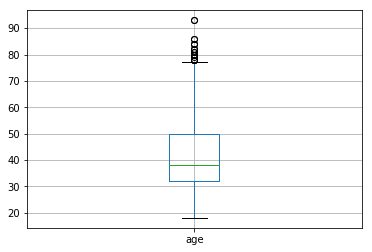

In [52]:
bank_df.boxplot(column='age')
plt.show()

So we see some age outliers especialy aged above 80.

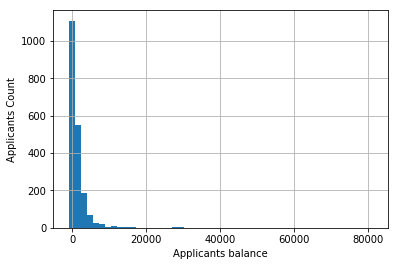

In [50]:
bank_df['balance'].hist(bins=50)
plt.xlabel('Applicants balance')
plt.ylabel('Applicants Count')
plt.show()

Very skewed distribution, we're surely having outliers for this variable

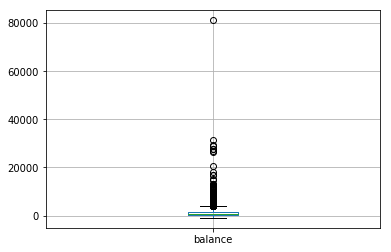

In [51]:
bank_df.boxplot(column='balance')
plt.show()

So we have the 80000 outlier and the remaining values are under 40000.
Let us see what we get after removing this outlier.

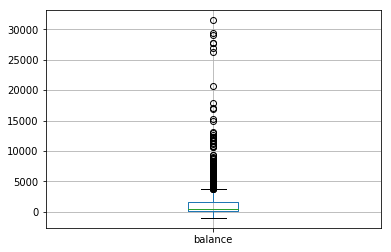

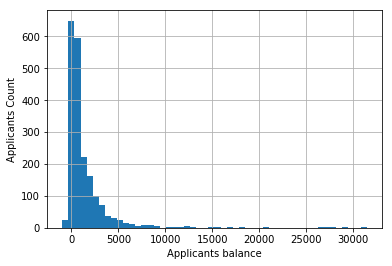

In [55]:
bank_df2 = bank_df[bank_df["balance"] < 80000]
bank_df2.boxplot(column='balance')
plt.show()
bank_df2['balance'].hist(bins=50)
plt.xlabel('Applicants balance')
plt.ylabel('Applicants Count')
plt.show()

We decide to continue with the remaining data as we're not sure balance values other than 80000 are outliers

In [56]:
bank_df = bank_df.loc[bank_df['balance'] < 80000]

#### Categorical variables

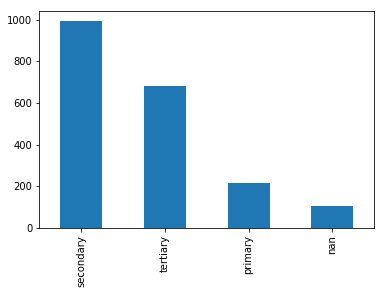

In [57]:
bank_df['education'].value_counts(dropna=False).plot(kind='bar')
plt.show()

The majority of applicants are either with a secondary or tertiary education level, we also have some application for whom we 
don't know the education level coded as "nan"

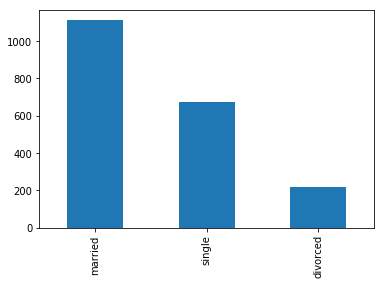

In [58]:
bank_df['marital'].value_counts(dropna=False).plot(kind='bar')
plt.show()

Most of applicants are married

## Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

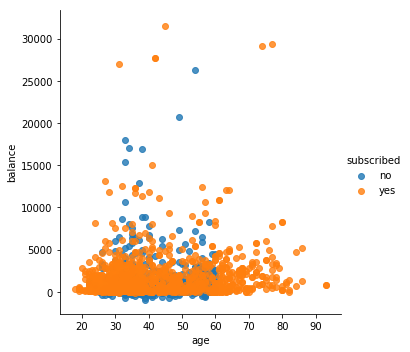

In [68]:
sns.lmplot( x="age", y="balance", data=bank_df, fit_reg=False, hue='subscribed', legend=True)
plt.show()

Points are in majority overlaping when using age and balance variables, hence, we can not use these two variables to separate our target variable

Text(0.5,0.98,'')

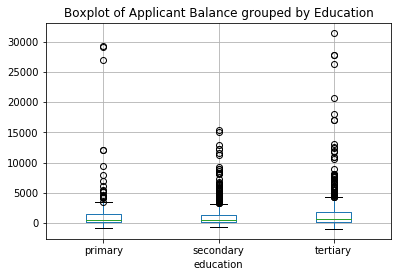

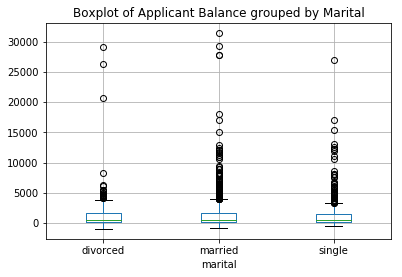

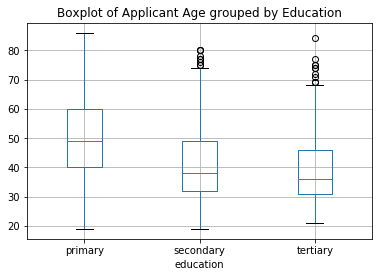

In [74]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
bank_df.boxplot(column='balance', by='education')
plt.title('Boxplot of Applicant Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title


# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
bank_df.boxplot(column='balance', by='marital')
plt.title('Boxplot of Applicant Balance grouped by Marital')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title

# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
bank_df.boxplot(column='age', by='education')
plt.title('Boxplot of Applicant Age grouped by Education')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title

Applicants with tertiary education level have greater balance than others, and are also younger than other applicants

### Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

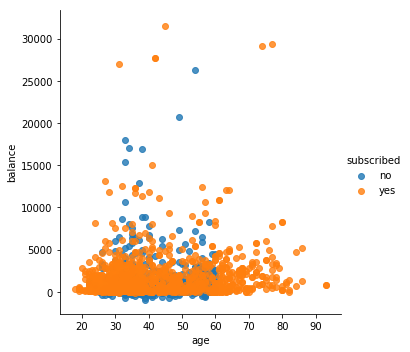

1


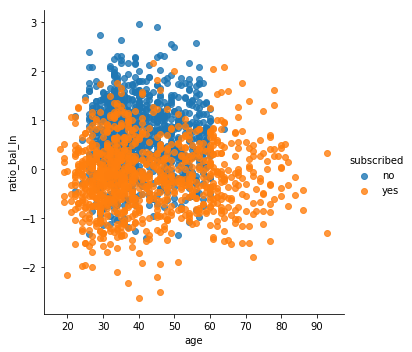

2


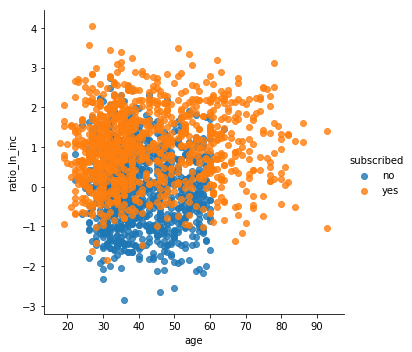

3


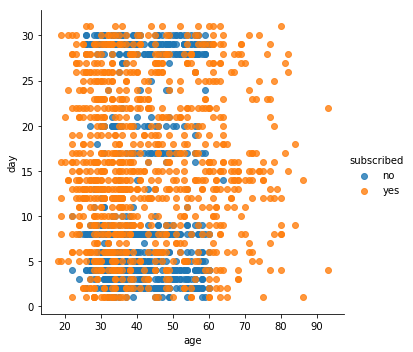

4


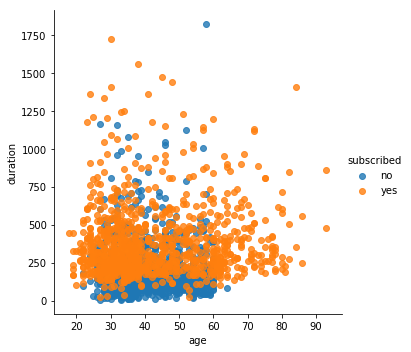

5


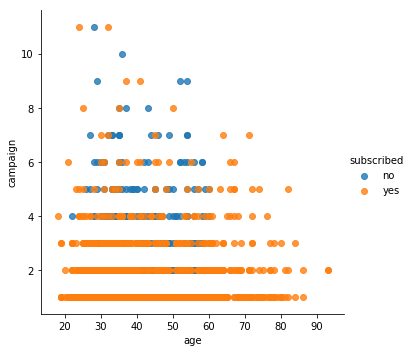

6


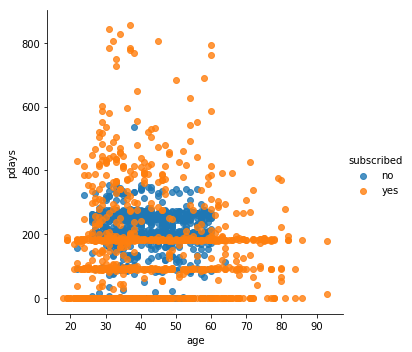

7


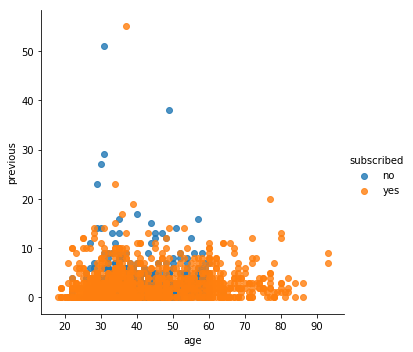

8


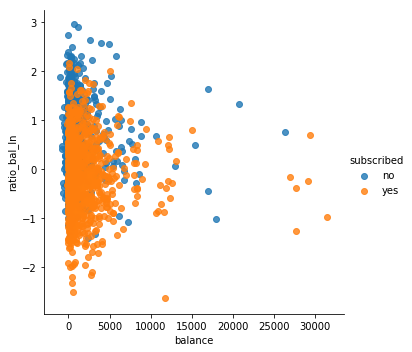

9


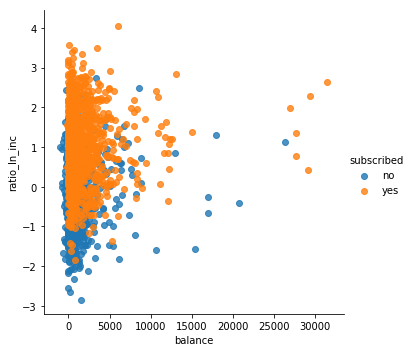

10


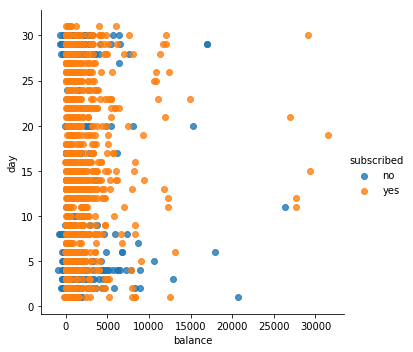

11


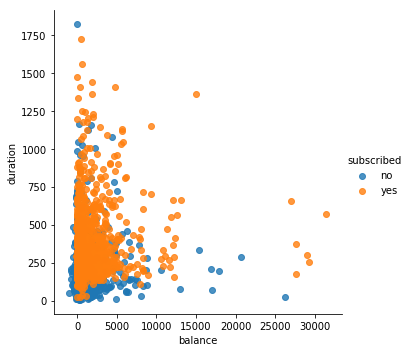

12


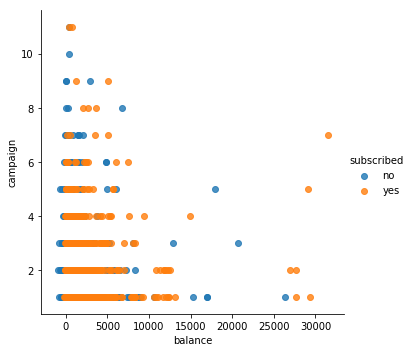

13


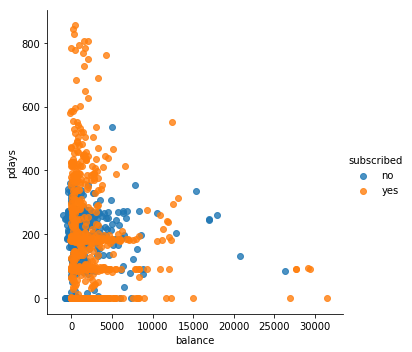

14


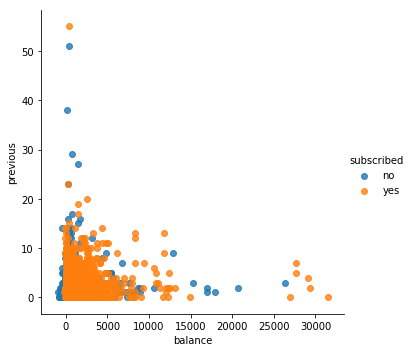

15


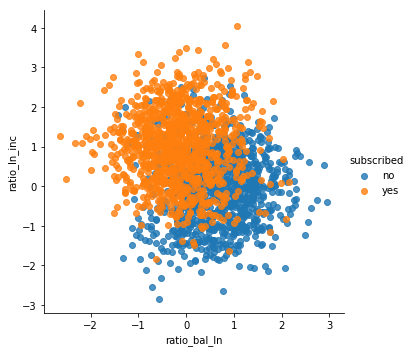

16


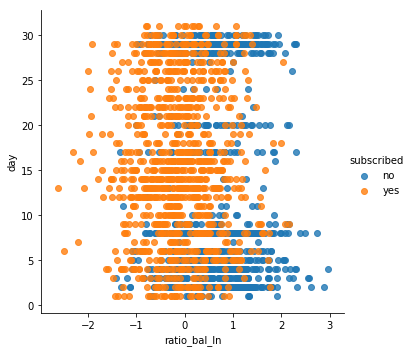

17


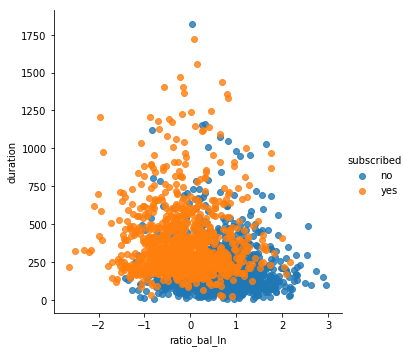

18


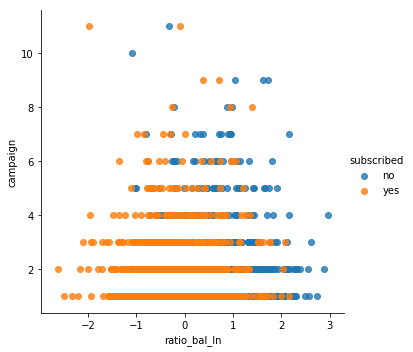

19


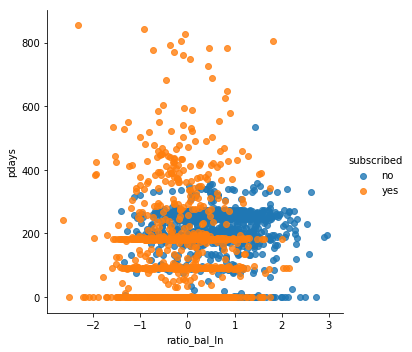

20


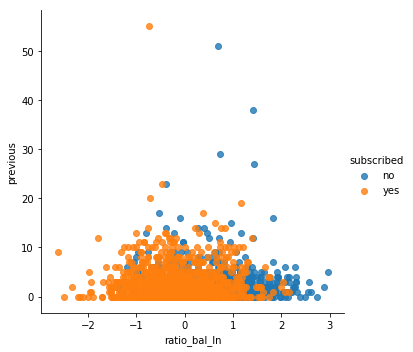

21


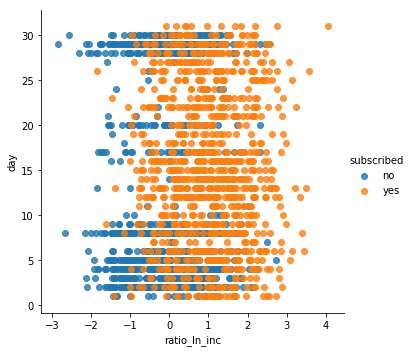

22


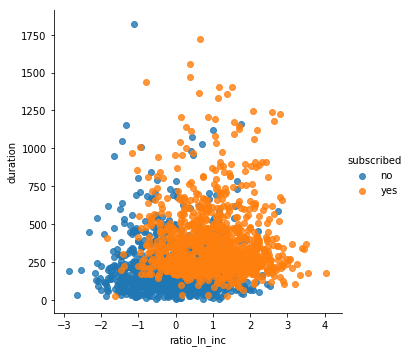

23


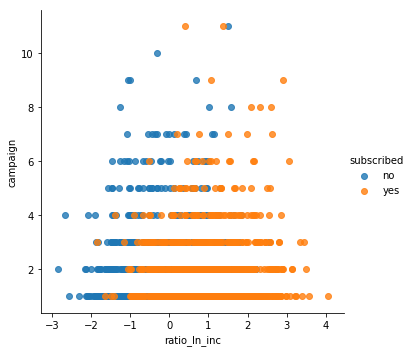

24


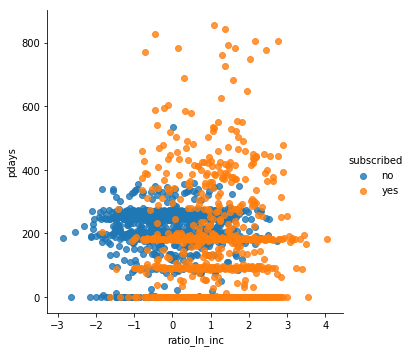

25


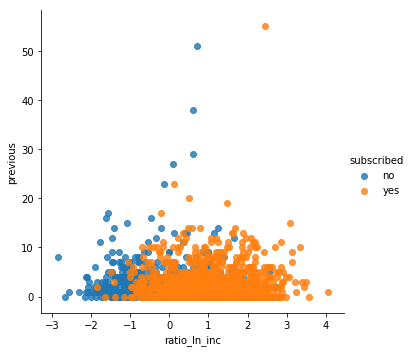

26


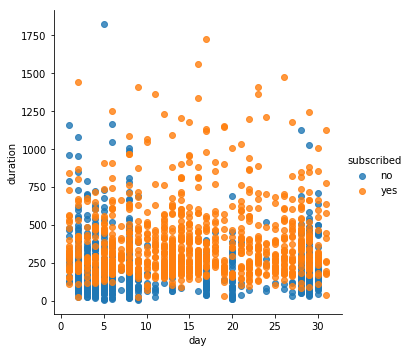

27


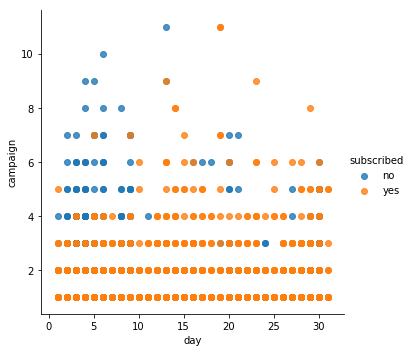

28


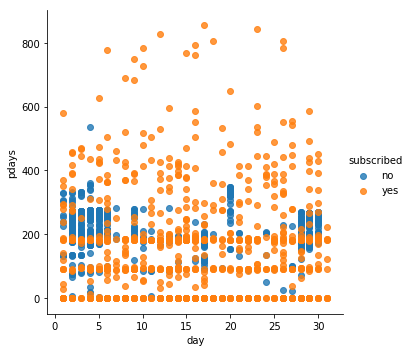

29


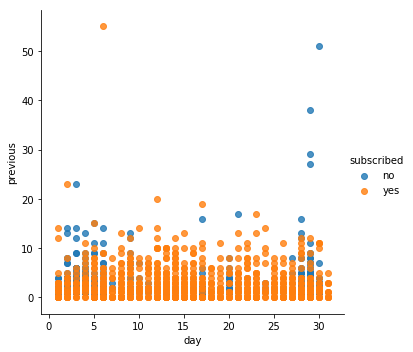

30


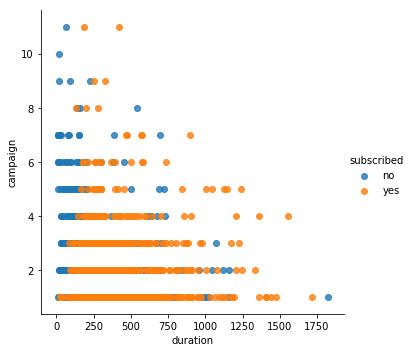

31


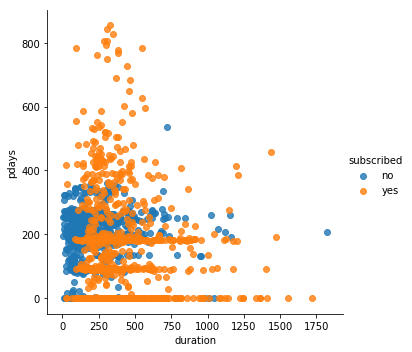

32


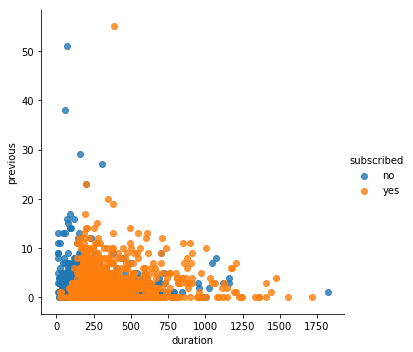

33


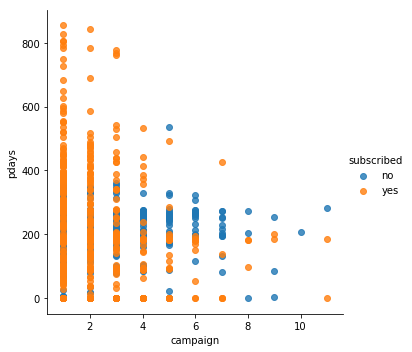

34


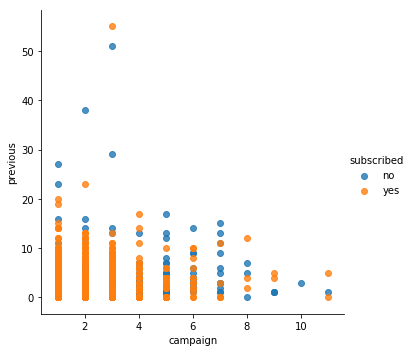

35


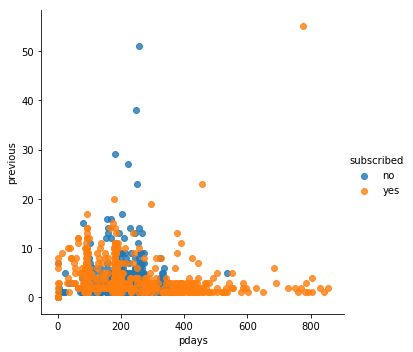

36


In [77]:
# all numerical values in names[]
numerics=["age","balance","ratio_bal_ln", "ratio_ln_inc", "day","duration","campaign","pdays","previous"]

graphs = []
i = 0
for x in numerics:
    for y in numerics: 
        if(x!=y):
            this_graph = x+y
            this_graph2 = y+x
            if this_graph in graphs:
                continue
            elif this_graph2 in graphs:
                continue
            else:
                i += 1
                graphs.append(this_graph)
                sns.lmplot(x, y, bank_df, hue='subscribed', fit_reg=False)
                #fig = plt.gcf()
                #fig.set_size_inches(15, 10)
                plt.show()
                print(i)

### ratio_bal_ln by ratio_ln_inc plot is the one that makes us thing these two attributes may be the best ones that can separate the selected target, we clearly see two clusters even if they are overlaped, but they are really less overlaped than for other attributes

# Task3

The **dataset** provided in the task consists of 2000 samples which correspond to historical records regarding a marketing campaign.
We are trying to extract a two dimensional **input space** that can be utilized to predict the **output space** which refers to whether the customer has already subscribed to a term deposit product or not.
The two inputs selected on the decision making process above are
- balance / loan ratio
- loan / income ratio

These two attributes will be used to learn and identify an **unknown target function** which links to the above mentioned input and output spaces. Our objective is to use the perceptron algorithm to determine the **hypothesis set**. Out of the probable candidates of the hypothesis set, we would need to determine the best suited one for the problem which would be the **final hypothesis**.
On Execution of PLA on the dataset, there is a need to compare **in-sample error** and the **out-sample** error against the Hoeffding bound and determine if learning is indeed possible.


# Task 4

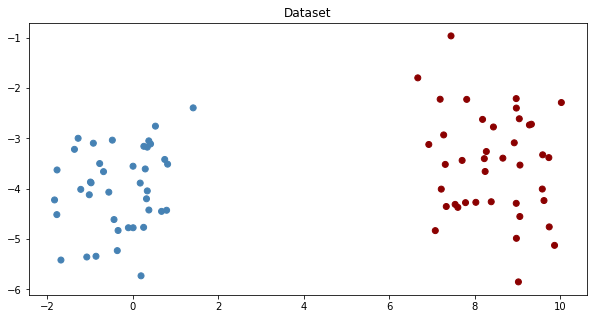

In [193]:
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
X, y = make_blobs(n_samples=80, centers=2, n_features=2)
#X, y = make_moons(n_samples=1000, noise=0.15)
y = [yy if yy == 1 else -1 for yy in y] 

print_dataset(X, y)

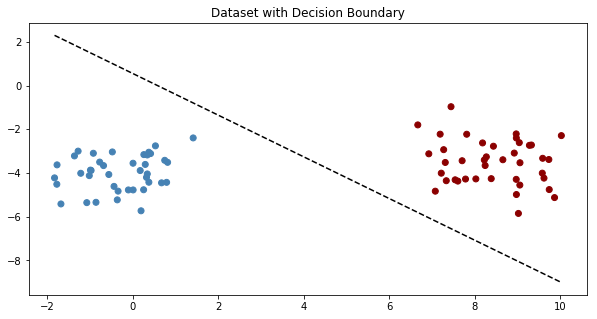

Number of Iterations:          2
Number of Training Samples:   80
Calculation Error:             0.00


In [194]:
run_pla(X,y);

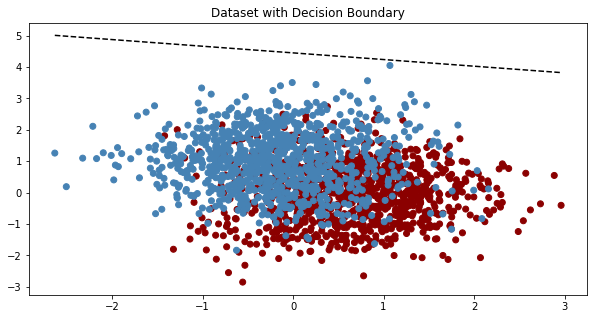

Number of Iterations:        100
Number of Training Samples: 1999
Calculation Error:             0.00


In [195]:
y=(bank_df['subscribed']=="yes")*1
y = [yy if yy == 1 else -1 for yy in y] 
X=bank_df[['ratio_bal_ln','ratio_ln_inc']].values
run_pla(X,y);

### we see that the line is not at all discriminating the subscribed categories.It is suspected that the fact subscribed is ordered in the original dataframe is preventing from clean classification.

In [196]:
##We shuffle the order in the dataframe and re run the PLA
df = bank_df.sample(frac=1).reset_index(drop=True)


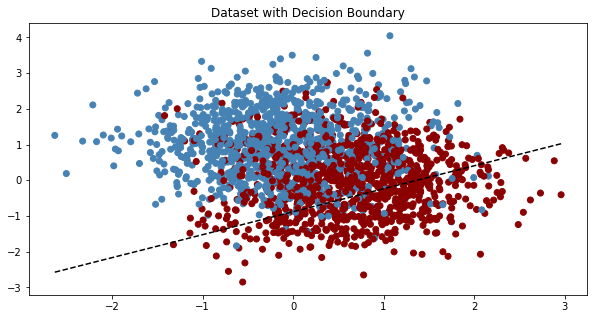

Number of Iterations:        100
Number of Training Samples: 1999
Calculation Error:             0.00


In [197]:
y=(df['subscribed']=="yes")*1
y = [yy if yy == 1 else -1 for yy in y] 
X=df[['ratio_bal_ln','ratio_ln_inc']].values
run_pla(X,y);

### Really better results. 


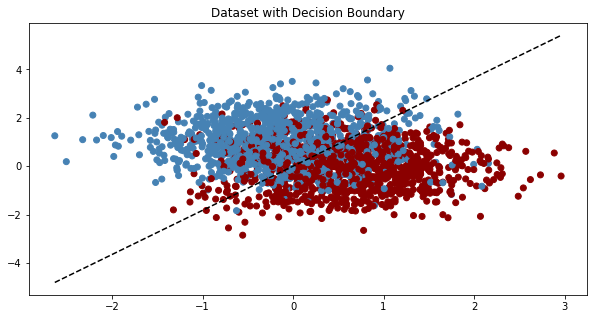

Number of Iterations:       1000
Number of Training Samples: 1999
Calculation Error:             0.00


In [200]:
#With max_iterations=1000
run_pla(X,y)

### Increasing Maximum iterations improved the results